## Classification Tree on Imbalanced Dataset
Trainer : - Rajesh Jakhotia

### Business Objective
- To build a Classification Tree model on the Personal Loan Cross-Sell Campaign data
- To understand the profile of Customers who are Responders vs. Non-Responders to the campaign
***
### About the Data
- MyBank executed a cross-sell campaign for personal loans. The bank randomly targeted 20000 of its existing deposit account customers with the Personal Loan offering lLoan a ant attractive interest rate of only 11 and NO Processing Fees%.The rate of interest is aAlmost 1% lower than the prevailing market rate.
***
### Data Summary
- No of customers targeted = 20,000,
- 1,733 out of 20,000 (i.e. ~8.67%) customers responded to the campaign offer
- Data is given in 2 files:
    - Dev_Sample.csv (14,000 records)
    - Holdout_Sample.csv (6,000 records)
- Dev_Sample Target Rate = 1235 / 14000 = 8.8 %
- Hold_Out Sample Target Rate = 498 / 6000 = 8.3 %

In [1]:
## Classification Tree on Imbalanced Dataset
import pandas as pd
import numpy as np

In [2]:
#Load the Dataset
CTDF_dev = pd.read_csv("DEV_SAMPLE.csv")
CTDF_holdout = pd.read_csv("HOLDOUT_SAMPLE.csv")

print( len(CTDF_dev),  len(CTDF_holdout))

14000 6000


In [3]:
CTDF_dev.head(10)

,Cust_ID,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,C16505,0,41,M,91519.92,SELF-EMP,38,41-45,926,15
1,C17241,0,52,M,117288.96,SAL,17,>50,768,13
2,C18802,0,31,F,259827.44,SENP,8,31-35,816,5
3,C19289,0,45,F,26677.55,PROF,14,41-45,353,18
4,C14028,0,39,F,43440.31,SENP,1,36-40,751,31
5,C17960,0,45,M,403324.49,SENP,11,41-45,364,2
6,C10216,1,33,M,245500.00,SAL,24,31-35,166,9
7,C4575,0,26,F,464931.92,SELF-EMP,18,26-30,448,28
8,C6171,0,38,M,49257.03,SAL,19,36-40,237,5
9,C484,1,44,M,10791.71,SELF-EMP,17,41-45,678,3


In [4]:
CTDF_dev['Target'].value_counts() # Training Set

Target
0    12765
1     1235
Name: count, dtype: int64

In [5]:
CTDF_dev['Target'].value_counts(normalize="index") # Training Set

Target
0    0.911786
1    0.088214
Name: proportion, dtype: float64

In [6]:
#Data Preprocessing
#Splitting into features and response variables
X =  CTDF_dev[['Age', 'Gender', 'Balance', 'Occupation',
               'No_OF_CR_TXNS', 'AGE_BKT', 'SCR', 'Holding_Period']]


In [7]:
#Categorical Variable to Numerical Variables
X_train = pd.get_dummies(X)  ## one-hot encoding ; dummy 1-0 matrix
X_train.columns

Index(['Age', 'Balance', 'No_OF_CR_TXNS', 'SCR', 'Holding_Period', 'Gender_F',
       'Gender_M', 'Gender_O', 'Occupation_PROF', 'Occupation_SAL',
       'Occupation_SELF-EMP', 'Occupation_SENP', 'AGE_BKT_26-30',
       'AGE_BKT_31-35', 'AGE_BKT_36-40', 'AGE_BKT_41-45', 'AGE_BKT_46-50',
       'AGE_BKT_<25', 'AGE_BKT_>50'],
      dtype='object')

In [8]:
X_train.head()

,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period,Gender_F,Gender_M,Gender_O,Occupation_PROF,Occupation_SAL,Occupation_SELF-EMP,Occupation_SENP,AGE_BKT_26-30,AGE_BKT_31-35,AGE_BKT_36-40,AGE_BKT_41-45,AGE_BKT_46-50,AGE_BKT_<25,AGE_BKT_>50
0,41,91519.92,38,926,15,False,True,False,False,False,True,False,False,False,False,True,False,False,False
1,52,117288.96,17,768,13,False,True,False,False,True,False,False,False,False,False,False,False,False,True
2,31,259827.44,8,816,5,True,False,False,False,False,False,True,False,True,False,False,False,False,False
3,45,26677.55,14,353,18,True,False,False,True,False,False,False,False,False,False,True,False,False,False
4,39,43440.31,1,751,31,True,False,False,False,False,False,True,False,False,True,False,False,False,False


In [9]:
y_train = CTDF_dev["Target"]

In [10]:
print (type(X_train) , type(y_train))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [11]:
#Decision Tree - Classification Tree & Regression Tree
# CART - Classification And Regression Tree
#Loading the library
from sklearn.tree import DecisionTreeClassifier

#Setting the parameter
clf = DecisionTreeClassifier(criterion = "gini" , 
                             min_samples_split = 30, # 6% of the population
                             min_samples_leaf = 10, # 2% of the population
                             max_depth = 50)


#Calling the fit function to built the tree
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=50, min_samples_leaf=10, min_samples_split=30)

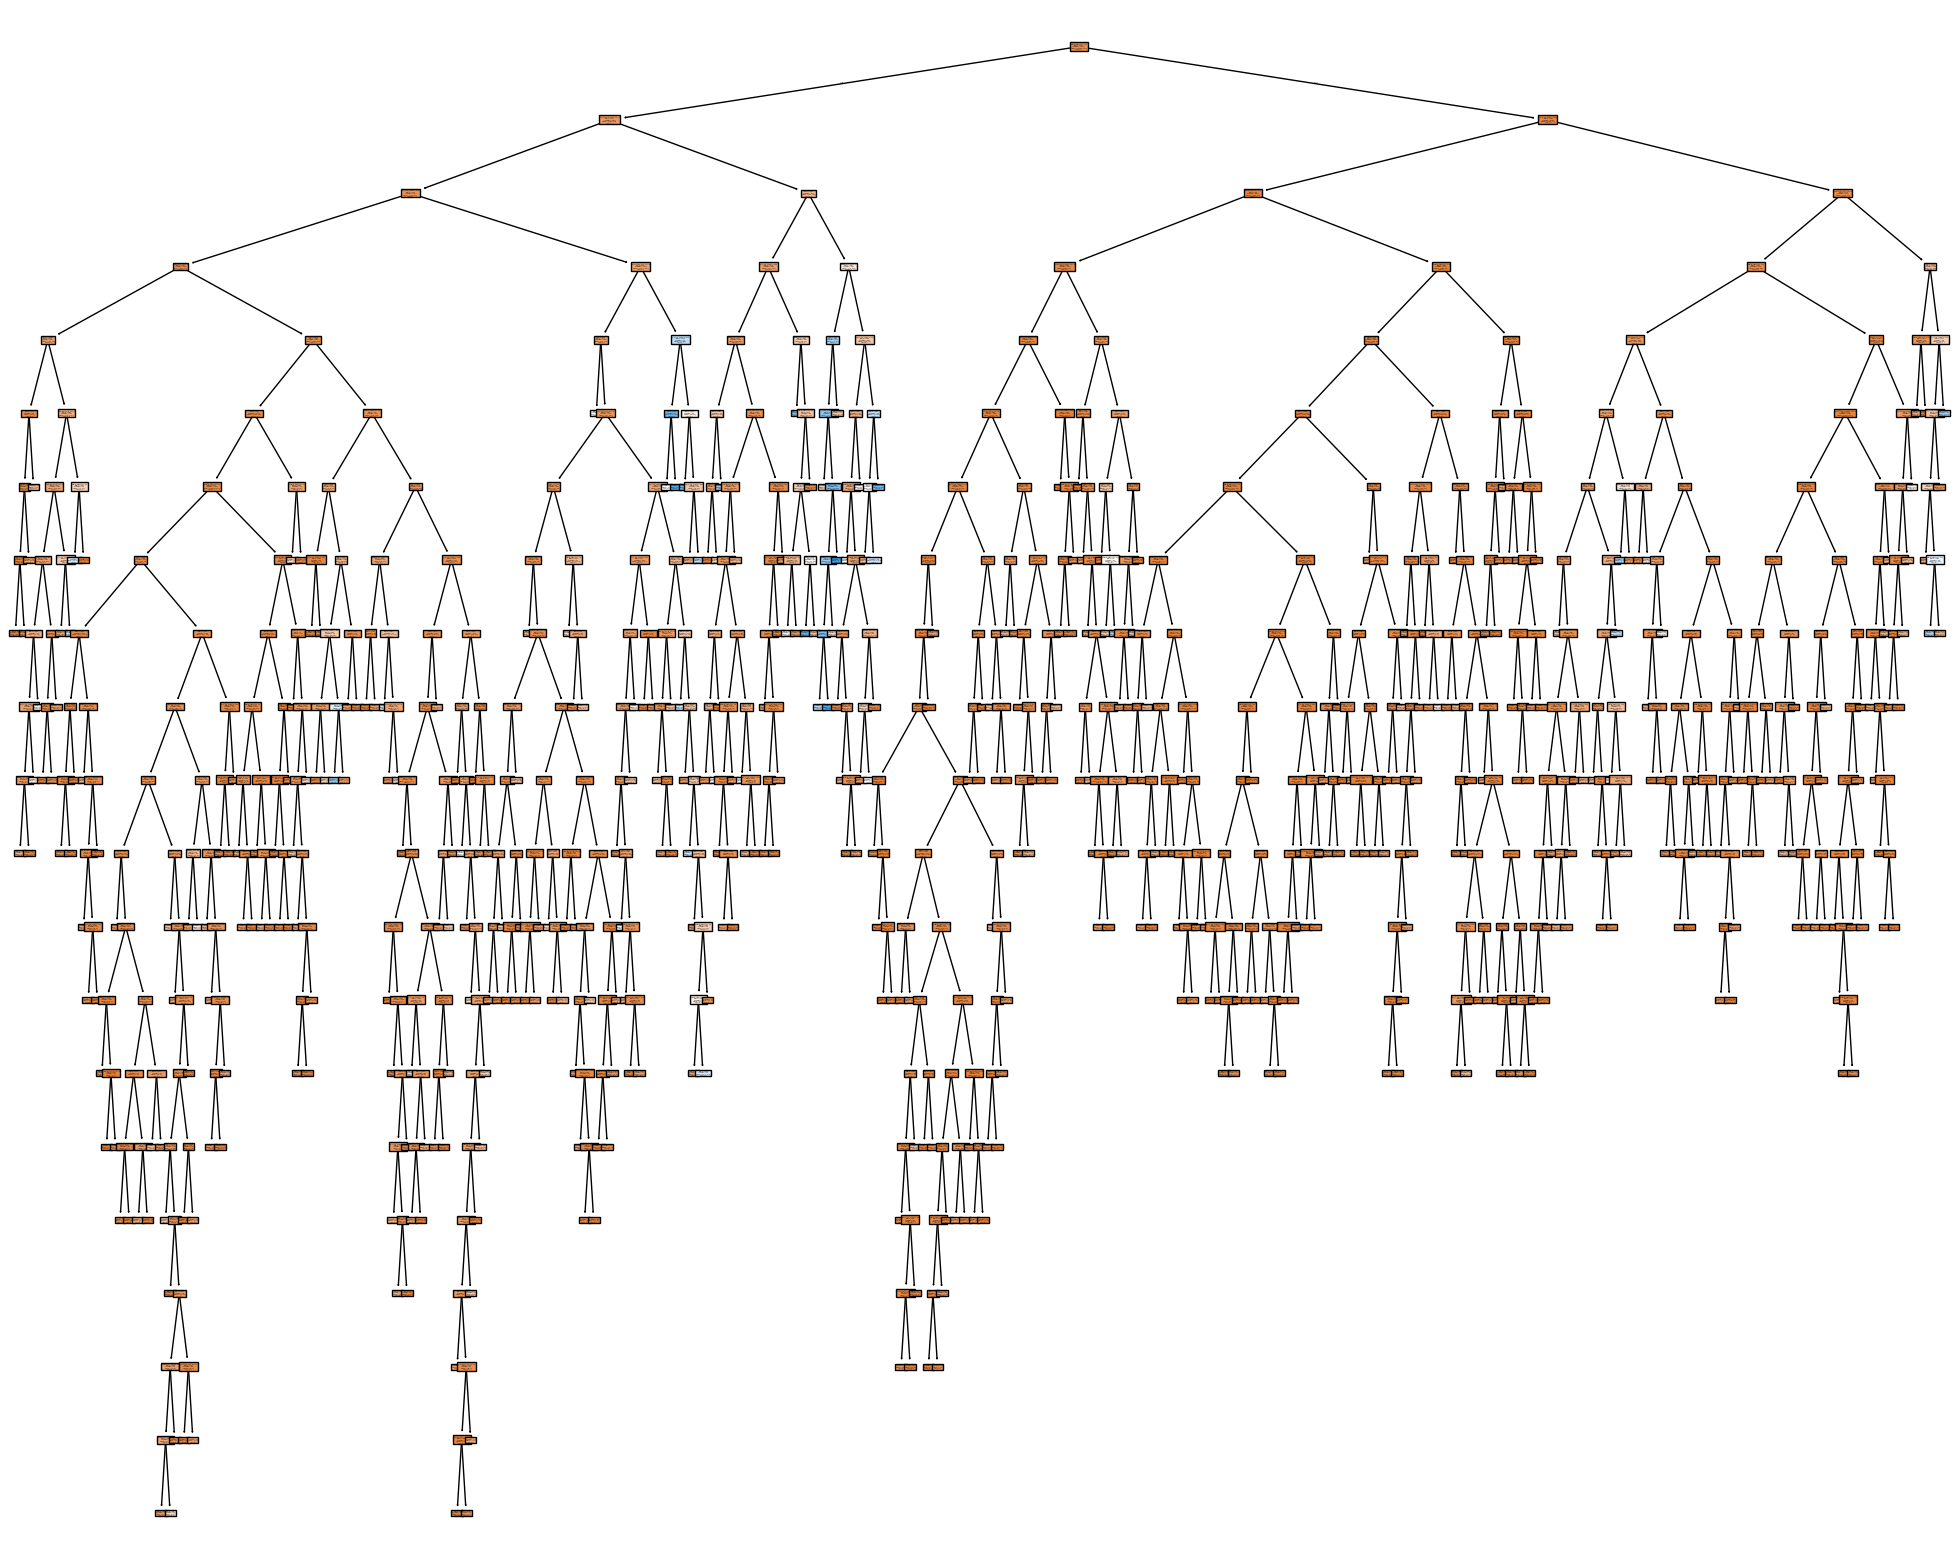

In [12]:
from sklearn import tree
from matplotlib import pyplot as plt
feature_list = list(X_train.columns.values)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_list,  
                   class_names=['0','1'],
                   filled=True)

In [13]:
## Let us see how good is the model
pred_y_train = clf.predict(X_train )   ### By default assumes 0.5 as cut-off
pred_y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
pd.crosstab(y_train, pred_y_train, margins=True)

col_0,0,1,All
Target,,,
0,12628,137,12765
1,941,294,1235
All,13569,431,14000


In [15]:
## Let us see the classification accuracy of our model
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
score = accuracy_score(y_train, pred_y_train)
score

0.923

In [16]:
12765 / 14000


0.9117857142857143

In [17]:
y_train_prob = clf.predict_proba(X_train)
## AUC
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob[:,1])
auc(fpr, tpr)

0.9247181770751566

In [18]:
## Let us see how good is the model
X_holdout =  CTDF_holdout[['Age', 'Gender', 'Balance', 'Occupation',
               'No_OF_CR_TXNS', 'AGE_BKT', 'SCR', 'Holding_Period']]
X_test = pd.get_dummies(X_holdout)
y_test = CTDF_holdout["Target"]


pred_y_test = clf.predict(X_test)
y_test_prob = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
auc(fpr, tpr)

0.6879561138045457

In [19]:
clf = DecisionTreeClassifier(max_depth = 10, min_samples_split = 100)
clf.fit(X_train,y_train)

y_train_prob = clf.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob[:,1])
print("Training AUC: ", auc(fpr, tpr))
      


Training AUC:  0.853139324855572


In [20]:
#Cross validation function

clf = DecisionTreeClassifier(max_depth = 10, min_samples_split = 350)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train , y_train, 
                         cv = 10, scoring='roc_auc')
print("scores.mean() = ", scores.mean(), "; scores.std() = ", scores.std())
clf.fit(X_train,y_train)

y_test_prob = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
print("Testing AUC: ", auc(fpr, tpr))

scores.mean() =  0.7601120132219313 ; scores.std() =  0.02373631576001971
Testing AUC:  0.7481872236309834


In [21]:
scores

array([0.75344589, 0.71795876, 0.73977055, 0.77127859, 0.8030031 ,
       0.76932071, 0.73469891, 0.76487448, 0.78621132, 0.76055782])

In [22]:
y_test_prob = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
auc(fpr, tpr)

0.7481872236309834

## Bias-Variance Trade Off

In [31]:
clf = DecisionTreeClassifier(max_depth = 20)
clf.fit(X_train,y_train)

y_train_prob = clf.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob[:,1])
print("Training AUC: ", auc(fpr, tpr))

y_test_prob = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
print("Testing AUC: ", auc(fpr, tpr))

Training AUC:  0.9997255907553391
Testing AUC:  0.5877667339660348


## Hyper-Parameter Tuning

### GridSearchCV

In [24]:
np.arange(3,10)

array([3, 4, 5, 6, 7, 8, 9])

In [25]:
## Tuning the Classifier using GridSearchCV
from sklearn.model_selection import GridSearchCV
#help(GridSearchCV)

param_dist = {"criterion": ["gini","entropy"],
              "max_depth": np.arange(3,10),
              "min_samples_split" :  [ 50, 100, 150]
              }
# Criterion has 2 levels
# 3 to 10 --- it has 7 levels

tree = DecisionTreeClassifier(
                             min_samples_leaf = 10)

tree_cv  = GridSearchCV(tree, param_dist, cv = 10, 
                        scoring = 'roc_auc', verbose = 10, n_jobs=-1)

tree_cv.fit(X_train,y_train)



Fitting 10 folds for each of 42 candidates, totalling 420 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(min_samples_leaf=10),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': [50, 100, 150]},
             scoring='roc_auc', verbose=10)

In [26]:
## Building the model using best combination of parameters
print(f"Tuned Decision Tree parameter : {tree_cv.best_params_}")

Tuned Decision Tree parameter : {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 150}


In [27]:
print(f"Development Model AUC : {tree_cv.best_score_}")

Development Model AUC : 0.7677262999911126


In [28]:
classifier = tree_cv.best_estimator_
y_test_prob = classifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
auc_h = auc(fpr, tpr)
print(f"Model AUC on Hold-out Sample : {auc_h}")

Model AUC on Hold-out Sample : 0.7546361381549463


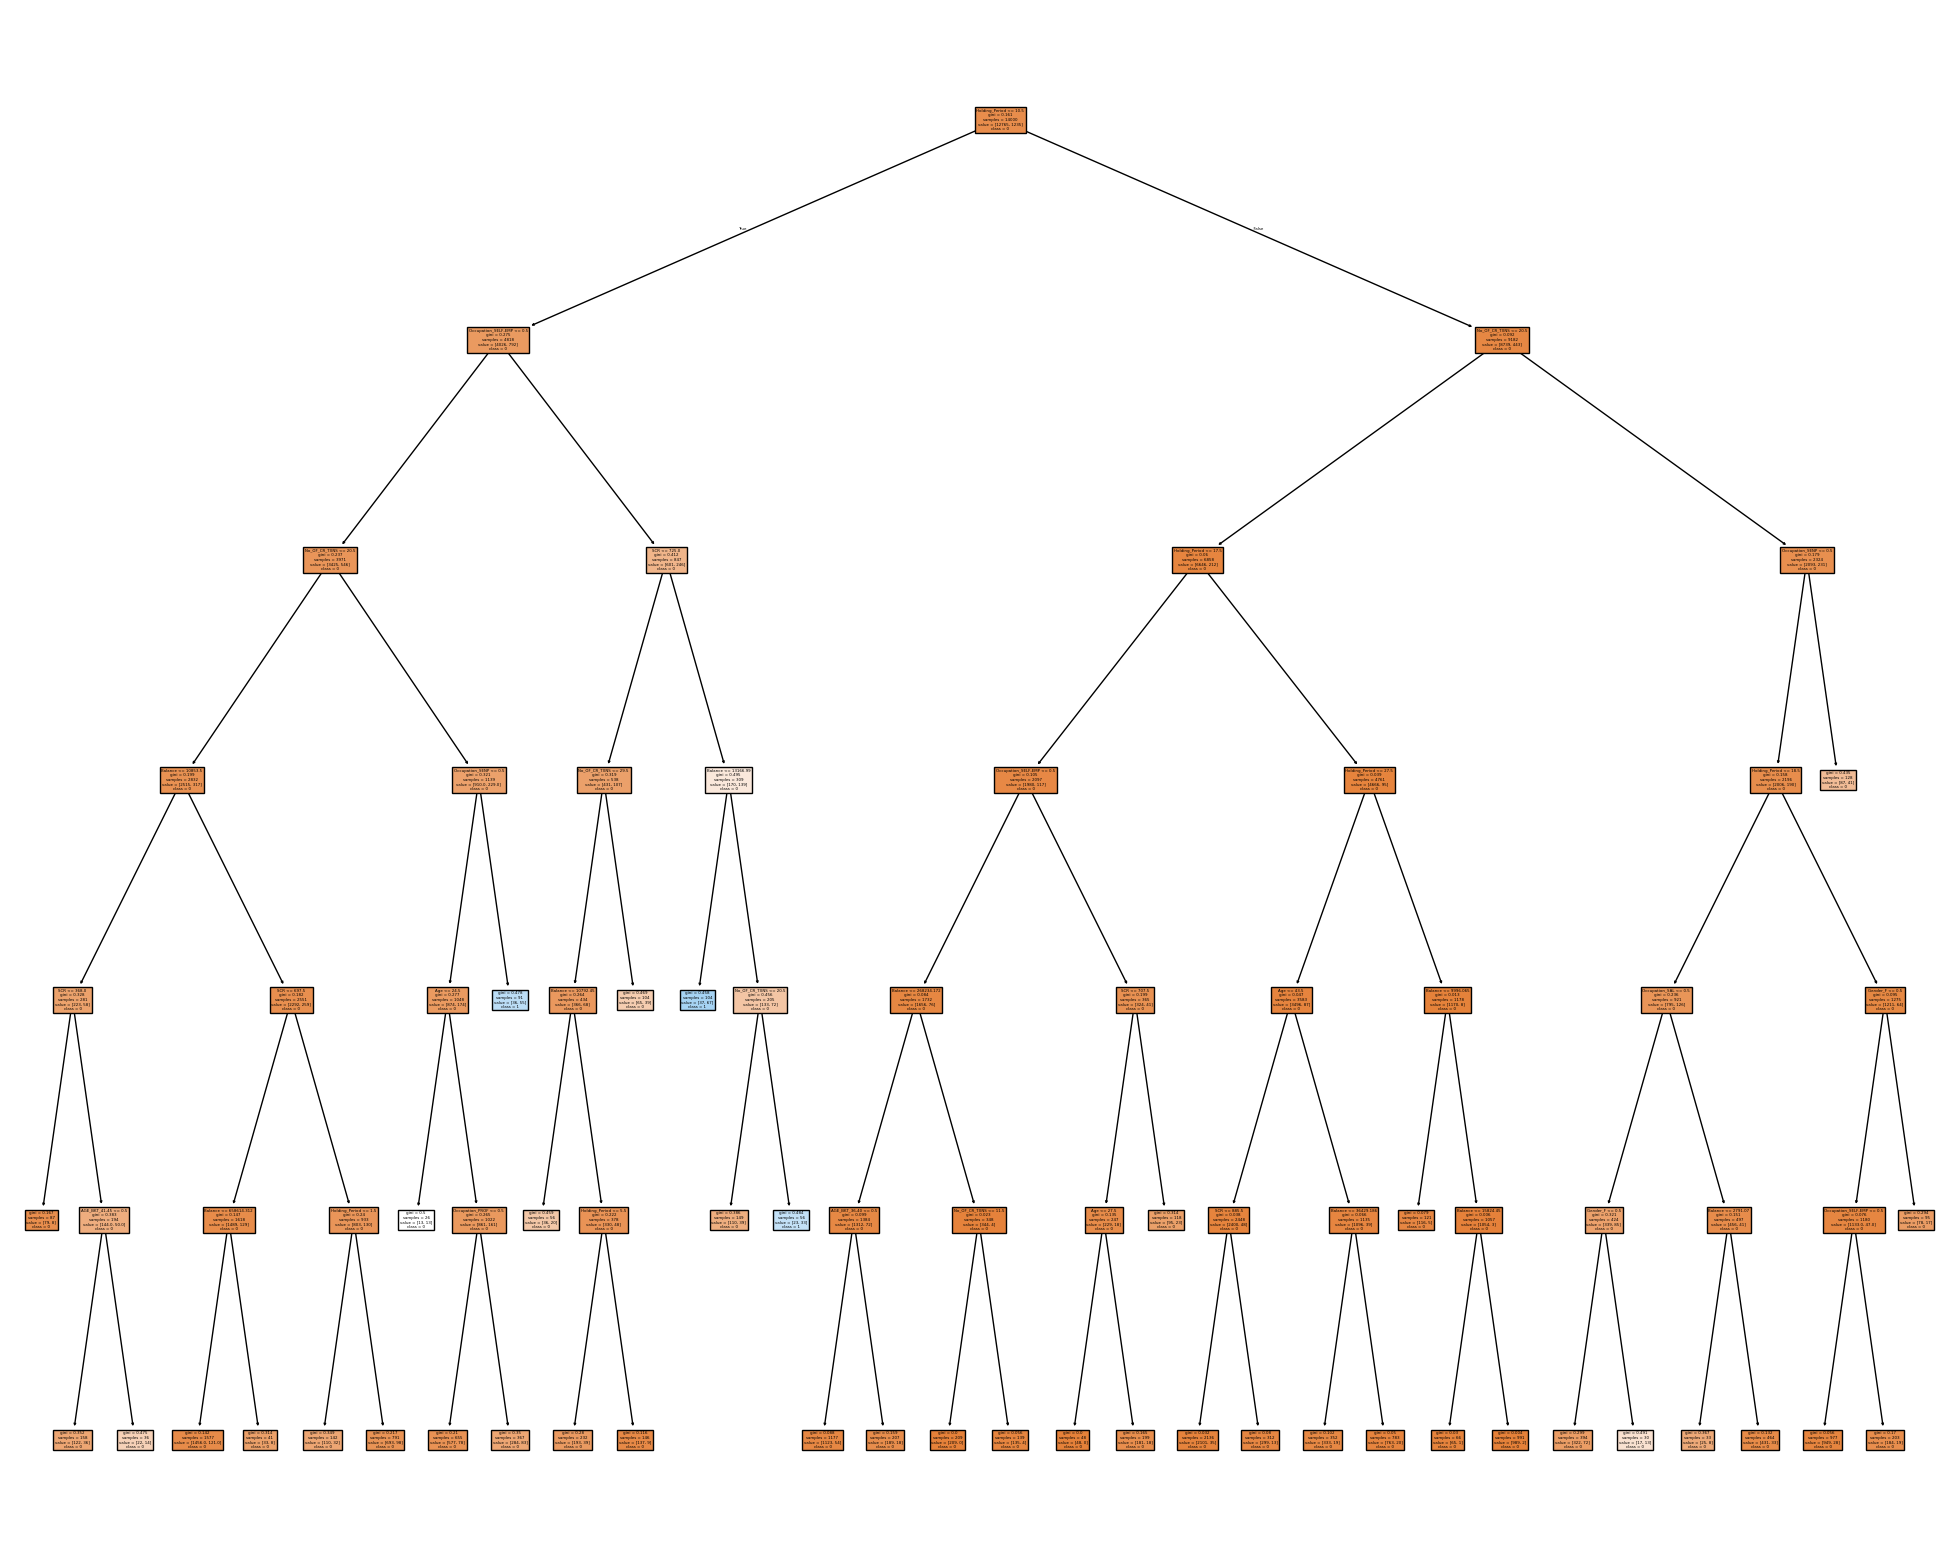

In [29]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, 
                   feature_names=feature_list,  
                   class_names=['0','1'],
                   filled=True)

## Thank you 